Problem 2

Import Data

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy.linalg import inv
from scipy.special import factorial
import math
N = 4600
bx = np.matrix(pd.read_csv('Bayes_classifier/X.csv',header=None))
by = np.matrix(pd.read_csv('Bayes_classifier/y.csv',header=None))
bxy = np.hstack((bx,by))
np.random.shuffle(bxy)
bxy_sub = np.split(bxy,10) 

(a)

Run the algorithm on 10 groups

In [2]:
y_hat = []
lamb_0 = []
lamb_1 = []
for i in range(0,10):
    lamb_0_ = []
    lamb_1_ = []
    y_hat_ = []
    sub = bxy_sub[:]
    test = sub.pop(i)
    sub = np.vstack(sub)
    pi_hat = sub[:,-1].sum()/(4600*0.9)
    for j in range(0,54):
        lamb_0_.append(((1+sum((1-np.array(sub[:,-1]))*np.array(sub[:,j])))/(1+sum(1-np.array(sub[:,-1]))))[0])
        lamb_1_.append(((1+sum((np.array(sub[:,-1]))*np.array(sub[:,j])))/(1+sum(np.array(sub[:,-1]))))[0])
    for a in range(0,460):
        p_y_0 = (1-pi_hat)*math.exp(np.sum((np.array(test[a,:-1])*np.log(np.array(lamb_0_))-np.array(lamb_0_))-np.log(factorial(np.array(test[a,:-1])))))
        p_y_1 = pi_hat*math.exp(np.sum((np.array(test[a,:-1])*np.log(np.array(lamb_1_))-np.array(lamb_1_))-np.log(factorial(np.array(test[a,:-1])))))
        if p_y_0>p_y_1:
            y_hat_.append(0)
        else:
            y_hat_.append(1)
    y_hat.extend(y_hat_)
    lamb_0.append(lamb_0_)
    lamb_1.append(lamb_1_)

Return the precision matrix

In [3]:
y_1_1 = 0
y_1_0 = 0
y_0_1 = 0
y_0_0 = 0
for i in range(0,4600):
    if y_hat[i]==1 and bxy[i,-1]==1:
        y_1_1+=1
    elif y_hat[i]==1 and bxy[i,-1]==0:
        y_1_0+=1
    elif y_hat[i]==0 and bxy[i,-1]==1:
        y_0_1+=1
    elif y_hat[i]==0 and bxy[i,-1]==0:
        y_0_0+=1
print('1-1 =', y_1_1)
print('1-0 =',y_1_0)
print('0-1 =',y_0_1)
print('0-0 =',y_0_0)
print('pricision =',(y_1_1+y_0_0)/4600)

1-1 = 1712
1-0 = 632
0-1 = 101
0-0 = 2155
pricision = 0.8406521739130435


(b)

Plotting lambda

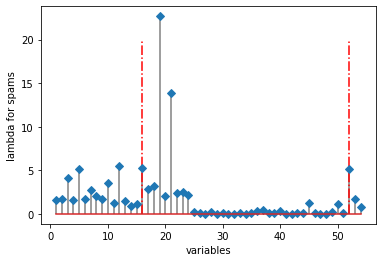

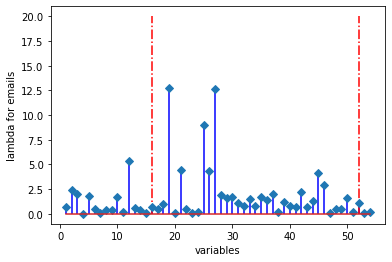

In [4]:
lamb_1_mean = np.mean(np.array(lamb_1), axis = 0)
lamb_0_mean = np.mean(np.array(lamb_0), axis = 0)
x = range(1,55)
plot_1 = plt.stem(x, lamb_1_mean,linefmt='grey', markerfmt='D', use_line_collection=True)
plt.ylabel('lambda for spams')
plt.xlabel('variables')
plt.vlines(x=16,ymin=0,ymax=20,colors='r',linestyles='-.')
plt.vlines(x=52,ymin=0,ymax=20,colors='r',linestyles='-.')
plt.show()
plot_0 = plt.stem(x, lamb_0_mean,linefmt='blue', markerfmt='D', use_line_collection=True)
plt.ylabel('lambda for emails')
plt.xlabel('variables')
plt.vlines(x=16,ymin=0,ymax=20,colors='r',linestyles='-.')
plt.vlines(x=52,ymin=0,ymax=20,colors='r',linestyles='-.')
plt.show()

(3) Knn classifier

In [5]:
y_hat_knn = []
for k in range(1,21):
    y_hat_k =[]
    for i in range(0,10):
        distance=[]
        y_hat_ = []
        sub = bxy_sub[:]
        test = sub.pop(i)
        train = np.vstack(sub)
        for j in range(460):
            distance = np.hstack((np.sum(np.abs(train[:,:-1]-test[j,:-1]),axis=1),train[:,-1]))
            distance_sort = distance[np.argsort(distance.A[:, 0])]
            distance_sort_top = distance_sort[:k,:]
            vote_1 = np.sum(distance_sort_top[:,1])
            vote_0 = k-vote_1
            if vote_1 > vote_0:
                y_hat_.append(1)
            else:
                y_hat_.append(0)
        y_hat_k.extend(y_hat_)
    y_hat_knn.append(y_hat_k)

In [6]:
precisions = 1-np.sum(np.abs(np.array(y_hat_knn).T-bxy[:,-1]),axis=0)/4600

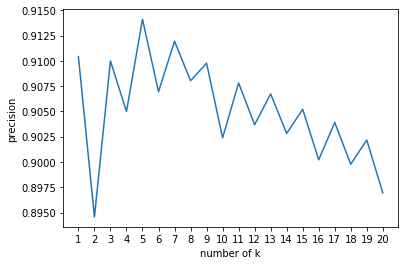

In [7]:
plt.plot(range(1,21), precisions.T)
plt.ylabel('precision')
plt.xlabel('number of k')
plt.xticks(np.arange(1, 21, 1))
plt.show()

Problem 3

(a)

In [13]:
X_train = np.matrix(pd.read_csv('X_train.csv',header=None))
y_train = np.matrix(pd.read_csv('y_train.csv',header=None))
X_test = np.matrix(pd.read_csv('X_test.csv',header=None))
y_test = np.matrix(pd.read_csv('y_test.csv',header=None))
X_train = X_train[:,0:-1]
X_test = X_test[:,0:-1]

Writing the function for predicting y

In [23]:
n = len(X_train)
K_n = np.zeros((n, n))
for i in range(0,n):
    for j in range(0,n):
        K_n[i,j] = -np.sum(np.square(X_train[i,:]-X_train[j,:]))
def gaussian_process_predict (x_new, b, sigma_quared):
    mu_ = np.exp(-np.sum(np.square(X_train-x_new),axis=1)/b).T.dot(inv(sigma_quared*np.identity(n)+np.exp(K_n/b))).dot(y_train)
    sigma = sigma_quared+1-np.exp(-np.sum(np.square(X_train-x_new),axis=1)/b).T.dot(inv(sigma_quared*np.identity(n)+np.exp(K_n/b))).dot(np.exp(-np.sum(np.square(X_train-x_new),axis=1))/b)[0,0]
    return (mu_[0,0],sigma)

(b)

In [24]:
y_hat_all = []
for b in range(5,16,2):
    for sigma_square in np.arange(0.1,1.1,0.1):
        y_hat = []
        for i in range(0,len(X_test)):
            y_hat.append(gaussian_process_predict(X_test[i,:], b, sigma_square))
        y_hat_all.append(y_hat)

,RMSE
"(11, 0.1)",1.890509
"(13, 0.1)",1.895850
"(9, 0.1)",1.897650
"(9, 0.2)",1.902521
"(7, 0.2)",1.904878
"(7, 0.3)",1.908082
"(15, 0.1)",1.909605
"(11, 0.2)",1.914983
"(7, 0.4)",1.915904
"(9, 0.3)",1.917650


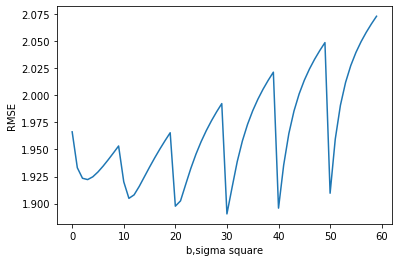

In [25]:
mu_hat = []
for i in y_hat_all:
    mu_ = [ j[0] for j in i ]
    mu_hat.append(mu_)
names = []
for b in range(5,16,2):
    for sigma_square in np.arange(0.1,1.1,0.1):
        name_ = (b,round(sigma_square,1))
        names.append(name_)
mu_hat = np.asarray(mu_hat)
RMSE = np.sqrt()
plt.plot(RMSE)
plt.xlabel('b,sigma square')
plt.ylabel('RMSE')
RMSE = pd.DataFrame(RMSE, columns=['RMSE'], index=names)
RMSE.sort_values(by=['RMSE'])

(c)

(7, 1.0), (5, 1.0),(5, 0.9),(11, 1.0),(9, 0.9). These are the lowest pairs that have the lowest RMSE values. Compared with what result of Ridge Regression, we can see that these 5 pairs of values are slightly lower than Ridge Regression (range from 2.6 to 3). But we can also see that there are some very high RMSE results like (7, 0.2) which has a RMSE over 700. The choise of sigma and b are very important in this study. With good parameters for the kernel, we can have very good results, however with bad ones, we may have horrible result. 

(d)

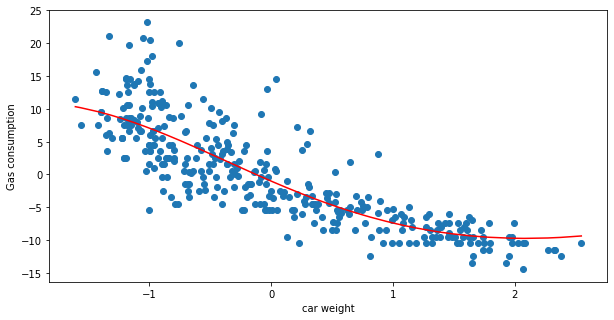

In [17]:
X_train_4 = X_train[:,3]
X_test_4 = X_test[:,3]
K_n_4 = np.zeros((n, n))
for i in range(0,n):
    for j in range(0,n):
        K_n_4[i,j] = -np.sum(np.abs(X_train_4[i,:]-X_train_4[j,:]),axis=1)[0,0]**2
def gaussian_process_predict_4 (x_new, b, sigma_quared):
    mu_ = np.exp(-(np.square(np.sum(np.abs(X_train_4-x_new),axis=1)))/b).T.dot(inv(sigma_quared*np.identity(n)+np.exp(K_n_4/b))).dot(y_train)
    return (mu_[0,0])
y_hat_4=[]
for i in range(0,len(X_train_4)):
    y_hat_4.append(gaussian_process_predict_4(X_train_4[i,:],b = 5, sigma_quared=2))
model_4 = pd.DataFrame([y_hat_4,y_train.T.tolist()[0],X_train_4.T.tolist()[0]]).T
model_4.columns =['y_hat', 'y_train','X_train']
model_4 = model_4.sort_values(by=['X_train'])
plt.figure(figsize=(10,5))
plt.scatter(model_4['X_train'], model_4['y_train'])
plt.plot(model_4['X_train'], model_4['y_hat'], color = 'red')
plt.xlabel('car weight')
plt.ylabel('Gas consumption')
plt.show()